### Name- Nupoor K

## Q.2. Carefully explain the differences between the KNN classifier and KNN regression methods.

### - KNN regressor is for numerical (quantitative) data.
### - KNN classifier is for scenarios with categorical (qualitative) response variables.

### - KNN Regression tries to predict value of output variable by using a local average.
### - KNN Classifier attempts to predict the class to which the output variable belongs by computing the local probability.

### - KNN Regression predicts continuous values for the response variable, which can span a range of real numbers
### - KNN Classifier the output indicates binary categories as 0 or 1.

## Q.9. This question involves the use of multiple linear regression on the Auto data set.

#### (a) Produce a scatterplot matrix which includes all of the variables in the data set.

In [83]:
import pandas as pd
import numpy as np

#vix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder

#load StatsModel API
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [84]:
auto= pd.read_csv('Auto.csv', na_values='?').dropna()

In [85]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [19]:
# Assuming 'df' is your DataFrame
feature_types = auto.dtypes

# Print the data types of each column
print(feature_types)


mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object


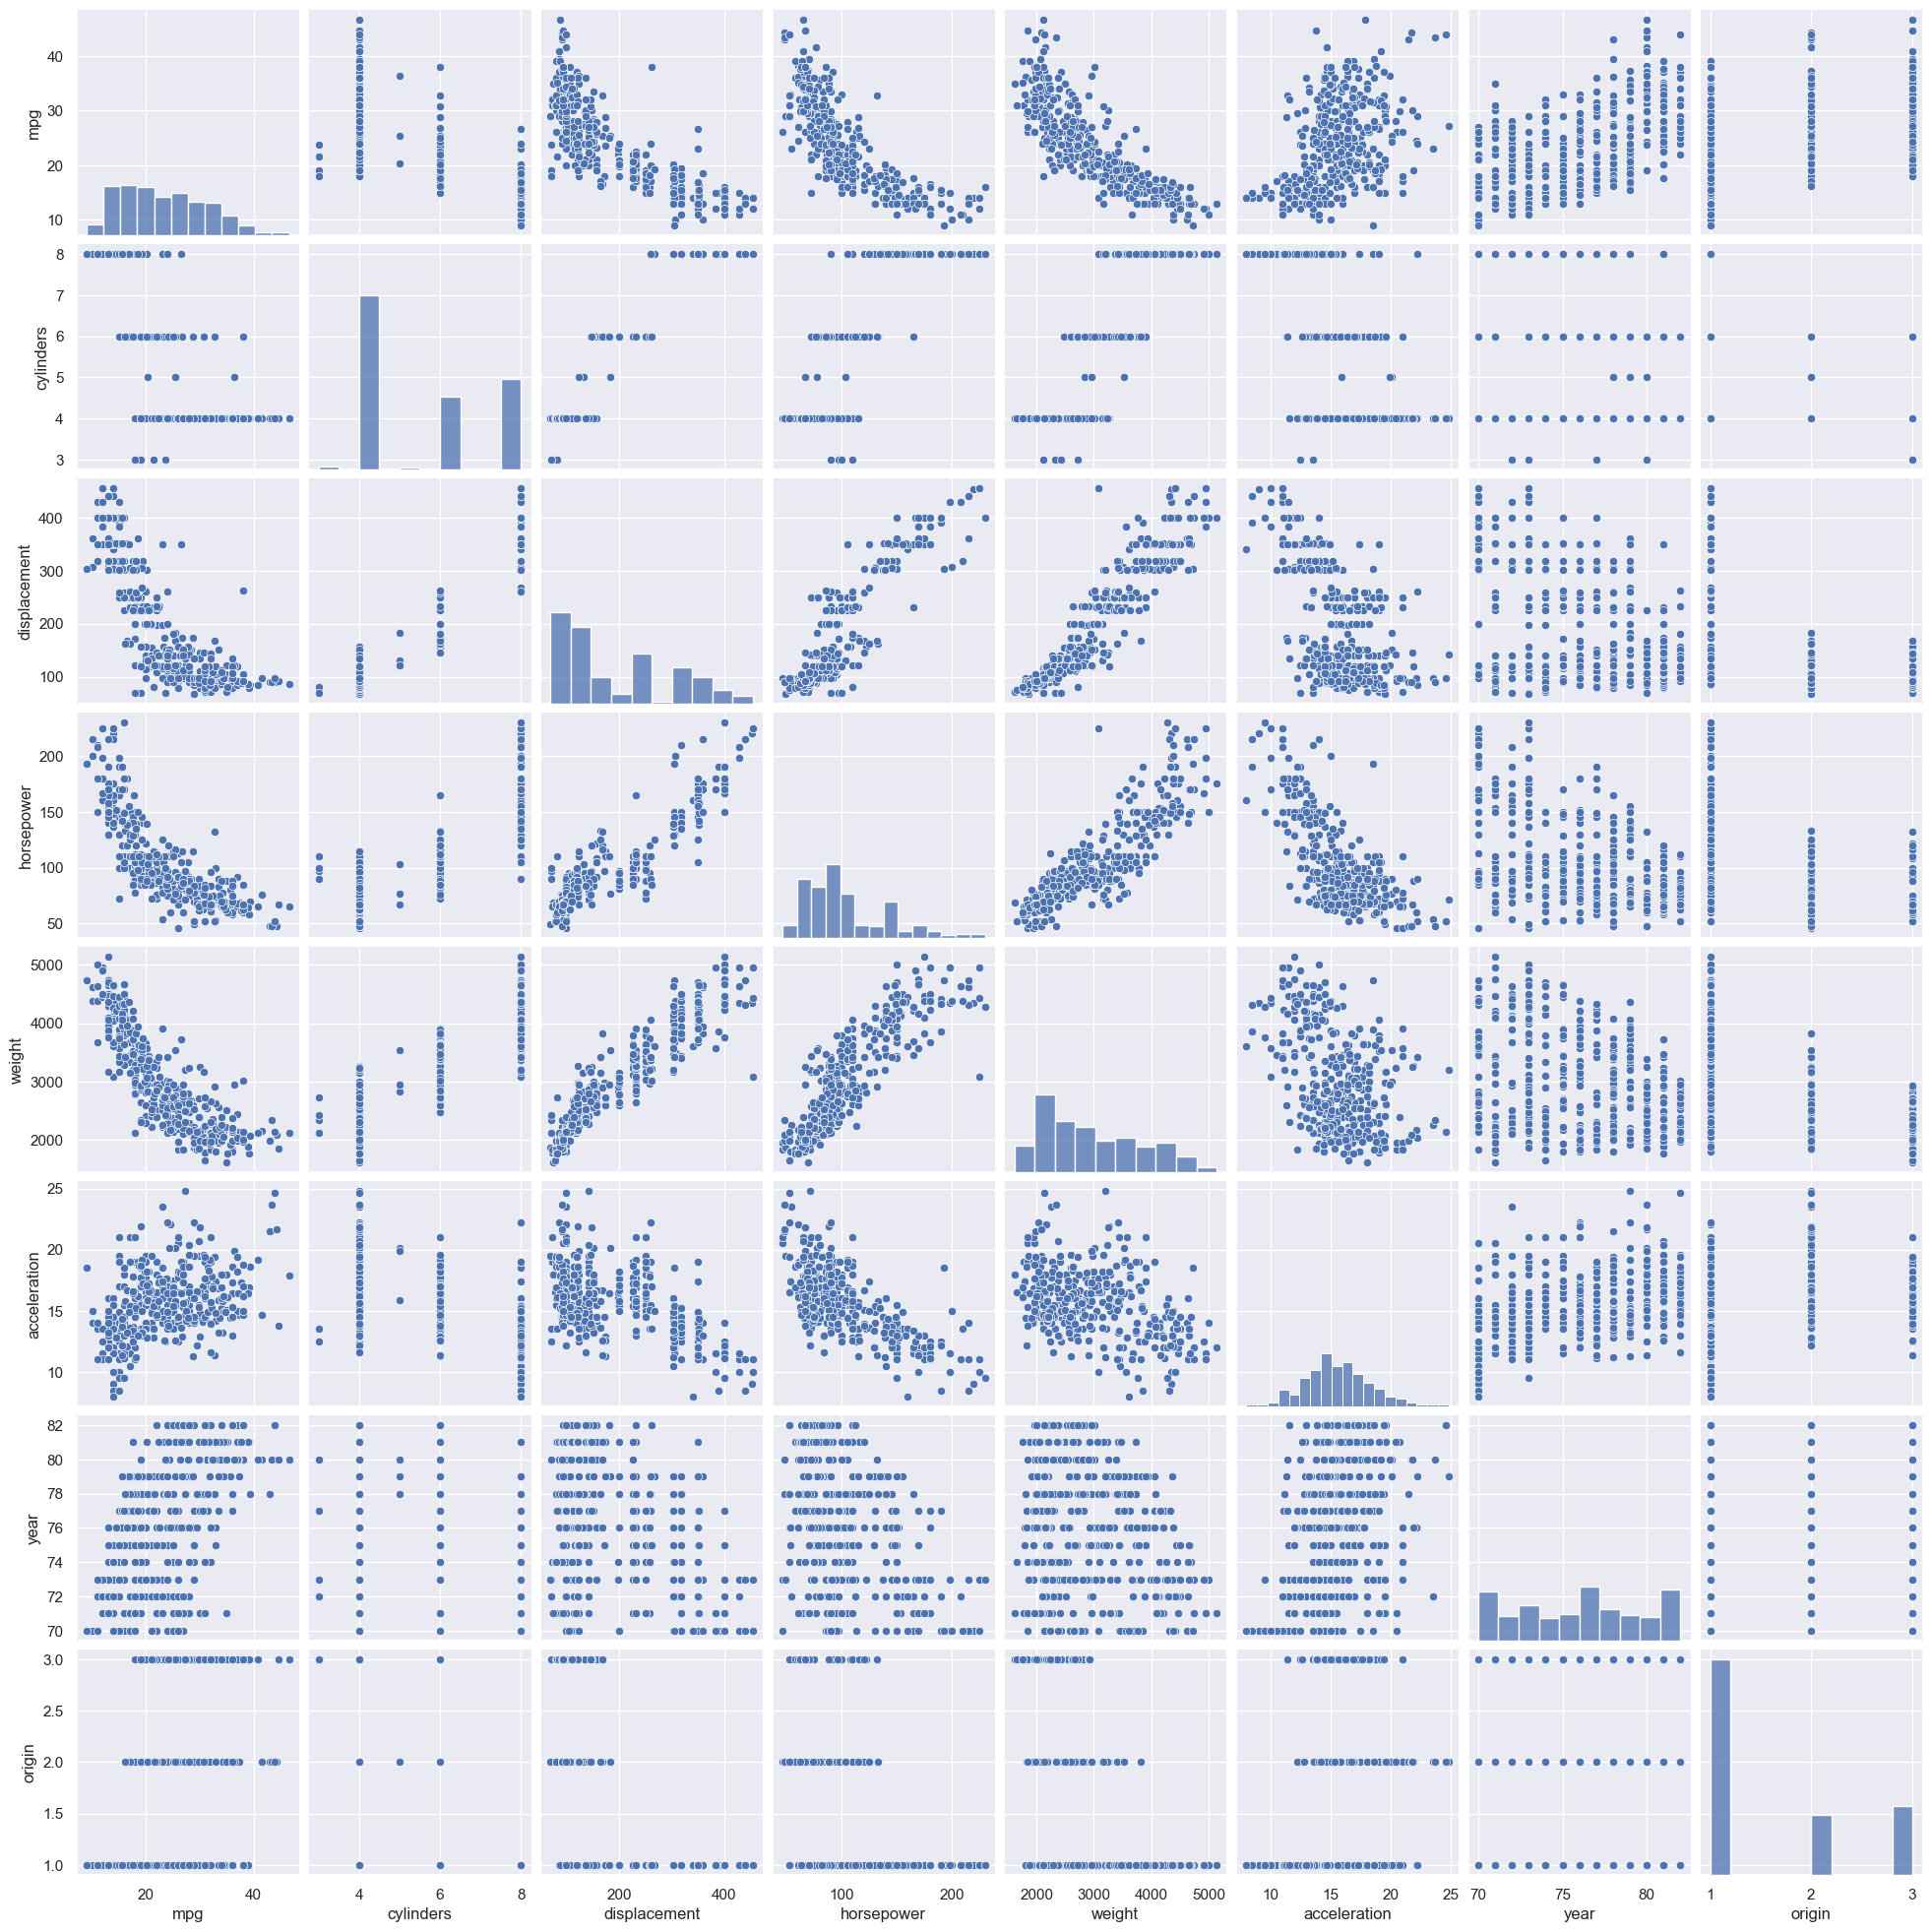

In [10]:
sns.pairplot(auto)

#### (b) Compute the matrix of correlations between the variables using the DataFrame.corr() method.

In [14]:
auto.corr()

/var/folders/8n/fkhnz2dj2q3c9g5bcrv652n40000gn/T/ipykernel_6318/668445388.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  auto.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


#### (c) Use the sm.OLS() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summarize() function to print the results. Comment on the output. For instance:

In [48]:
## multiple linear regression(MLR)
from statsmodels.formula.api import ols


X = (auto['mpg']).astype("float64")
y = sm.add_constant(auto.drop(columns = ["mpg", "name"]))
MLR_model = sm.OLS(X, y) 
MLR_results = MLR_model.fit()

MLR_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 21 Feb 2024   Prob (F-statistic):          2.04e-139
Time:                        11:20:36   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### i. Is there a relationship between the predictors and the response? Use the anova_lm() function from statsmodels to answer this question.
There are multiple predictors that have a relationship with the response because their associated p-value is significant. The p-value tells us the probability that the coefficient will take a value of 0. The typical threshold for p-value is 0.05. If the probability is below 0.05, then that means chances that it will be 0 is very slim.

In [53]:
from statsmodels.stats.anova import anova_lm
mod_square = smf.ols(formula = "mpg ~ cylinders + np.square(cylinders)", data = auto).fit()
mod = smf.ols(formula = "mpg ~ cylinders", data = auto).fit()
anova_table = sm.stats.anova_lm(mod, mod_square)
anova_table

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,390.0,9415.910391,0.0,NaN,NaN,NaN
1,389.0,9350.088340,1.0,65.82205,2.738453,0.098766


In [55]:
mod_square = smf.ols(formula = "mpg ~ horsepower + np.square(horsepower)", data = auto).fit()
mod = smf.ols(formula = "mpg ~ horsepower", data = auto).fit()
anova_table = sm.stats.anova_lm(mod, mod_square)
anova_table

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,390.0,9385.915872,0.0,NaN,NaN,NaN
1,389.0,7442.029412,1.0,1943.88646,101.608283,2.196340e-21


In [54]:
mod_square = smf.ols(formula = "mpg ~ acceleration + np.square(acceleration)", data = auto).fit()
mod = smf.ols(formula = "mpg ~ acceleration", data = auto).fit()
anova_table = sm.stats.anova_lm(mod, mod_square)
anova_table

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,390.0,19550.461912,0.0,NaN,NaN,NaN
1,389.0,19198.965957,1.0,351.495955,7.121838,0.007934


#### ii. Which predictors appear to have a statistically significant relationship to the response?

Following 4 have a statistically significant relationship to the response:
displacement
weight
year
origin

#### iii. What does the coefficient for the year variable suggest?
A coefficient of 0.7508 for the year variable in a linear regression model suggests that, for each one-unit increase in the year variable (assuming it is measured in years), the predicted value of the response variable (in this case, mpg) is expected to increase by 0.7508 units, all else being equal.

## (d) Produce some of diagnostic plots of the linear regression fit as described in the lab. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

In [69]:
# from float to string type 
Auto = auto.astype({"mpg": 'str', "displacement": 'str', "horsepower": 'str', "acceleration": 'str'}) 
print() 

print(auto.dtypes) 
  
# print dataframe.  
auto  


mpg             object
cylinders        int64
displacement    object
horsepower      object
weight           int64
acceleration    object
year             int64
origin           int64
name            object
dtype: object


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


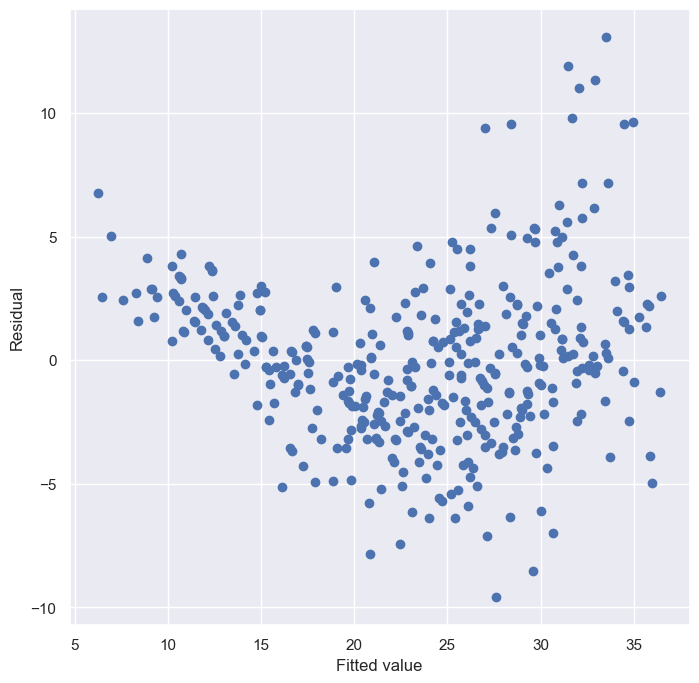

In [86]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(MLR_results.fittedvalues, MLR_results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
plt.show()

<Axes: xlabel='horsepower', ylabel='mpg'>

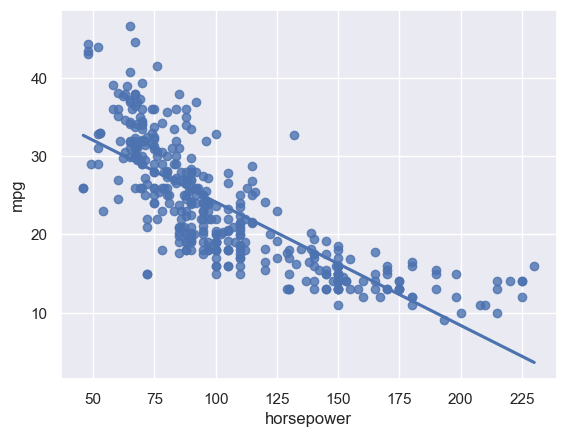

In [87]:
sns.regplot(x='horsepower',y='mpg',data=auto,ci=None)

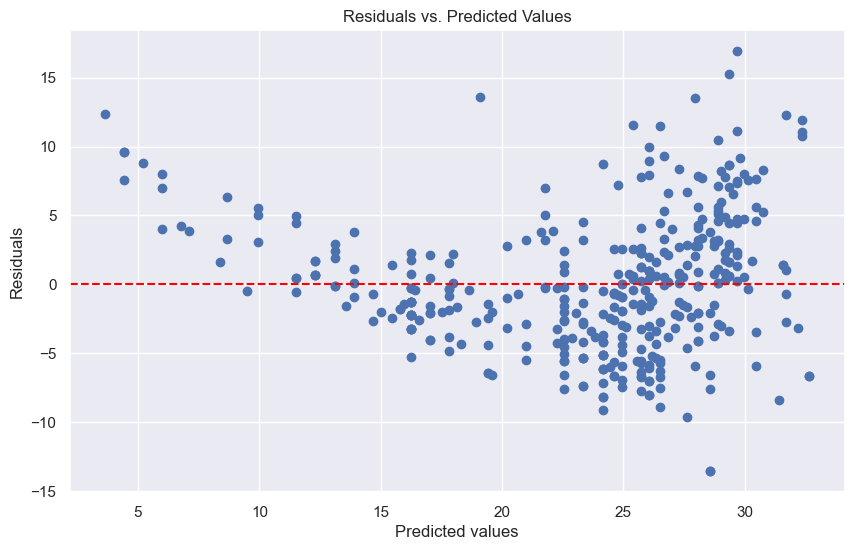

In [82]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming you have already fitted the linear regression model 'mod'
# 'auto' is the DataFrame containing your data

# Get the predicted values and residuals
predicted_values = mod.fittedvalues
residuals = mod.resid

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(predicted_values, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

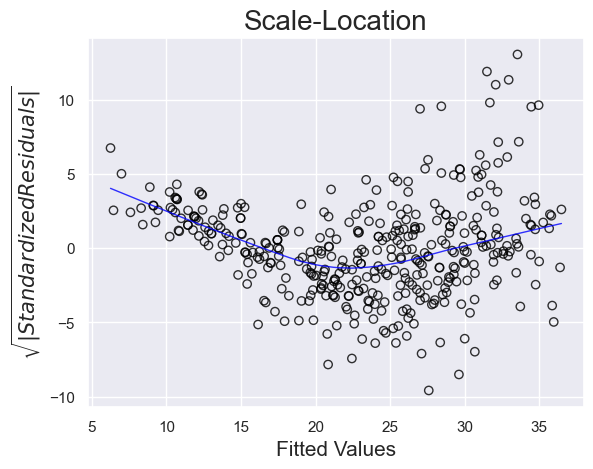

In [92]:
sns.regplot(x=MLR_results.fittedvalues, y=MLR_results.resid,
            scatter=True,
            ci=False,
            lowess=True,
            line_kws={'color': 'blue', 'lw': 1, 'alpha': 0.8},
            scatter_kws={'facecolors': 'none', 'edgecolors': 'black'})
plt.title('Scale-Location', fontsize=20)
plt.xlabel('Fitted Values', fontsize=15)
plt.ylabel('$\sqrt{|Standardized Residuals|}$', fontsize=15)
plt.show()

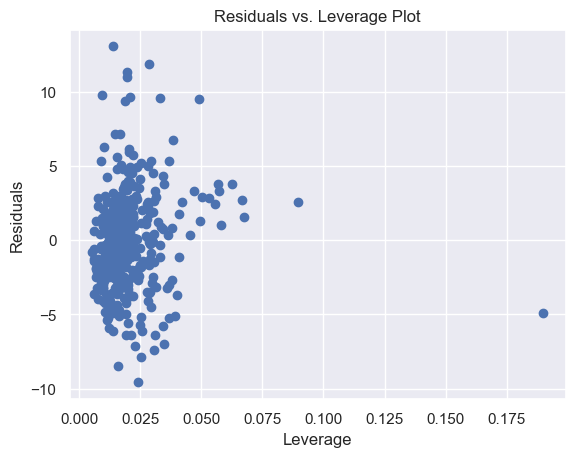

In [115]:
residuals = MLR_results.resid
leverage = oi.OLSInfluence(MLR_results).hat_matrix_diag
influence = oi.OLSInfluence(MLR_results).influence

# Plot the residuals vs. leverage to identify potential outliers
plt.scatter(leverage, residuals)
plt.xlabel("Leverage")
plt.ylabel("Residuals")
plt.title("Residuals vs. Leverage Plot")
plt.show()

## From all the above maps it can be seen that there are no unusually large outliers in the data.

## (e) Fit some models with interactions as described in the lab. Do any interactions appear to be statistically significant?

In [93]:
hp_displacement = sm.formula.ols('mpg ~ horsepower + displacement + horsepower:displacement', data=auto).fit()

# Fit the model with interaction between horsepower and origin
hp_origin = sm.formula.ols('mpg ~ horsepower + origin + horsepower:origin', data=auto).fit()

# Print summary of origin_hp model
print(hp_origin.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     276.4
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           6.15e-96
Time:                        14:56:10   Log-Likelihood:                -1137.1
No. Observations:                 392   AIC:                             2282.
Df Residuals:                     388   BIC:                             2298.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            26.7910      1.69

## (f) Try a few different transformations of the variables, such as log(X), √X, X2. Comment on your findings.

In [94]:
# Fit the linear regression model with different transformations
model_log = smf.ols(formula='mpg ~ np.log(horsepower)', data=auto).fit()
model_sqrt = smf.ols(formula='mpg ~ np.sqrt(horsepower)', data=auto).fit()
model_squared = smf.ols(formula='mpg ~ np.power(horsepower, 2)', data=auto).fit()

# Print the summaries of the models
print("Model with log transformation:")
print(model_log.summary())

print("\nModel with square root transformation:")
print(model_sqrt.summary())

print("\nModel with squared transformation:")
print(model_squared.summary())

Model with log transformation:
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     785.9
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           1.70e-95
Time:                        15:00:02   Log-Likelihood:                -1144.9
No. Observations:                 392   AIC:                             2294.
Df Residuals:                     390   BIC:                             2302.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Inter

### From the above output, it can be concluded that the best model is the log(X) as the R- squared is highest in that and the aic and bic are also lowest.

## 10. This question should be answered using the Carseats data set.

### (a) Fit a multiple regression model to predict Sales using Price,Urban, and US.

In [100]:
import pandas as pd

# URL to the raw CSV file on GitHub
carseats = "https://raw.githubusercontent.com/uky994/ISLR-Py/main/Week%201/Carseats.csv"

# Read the CSV file
cs = pd.read_csv(carseats)

# Display the first few rows
cs.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [101]:
cs.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [102]:
# Define the formula for the model
cs_model = 'Sales ~ Price + Urban + US'

# Fit the linear regression model
lm_fit = sm.formula.ols(cs_model, data=cs).fit()

print(lm_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           2.39e-23
Time:                        15:18:59   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036   

### (b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

When price increases by 1000 dollars and other predictors are held constant, sales decrease by 54.5 unit sales. In otherwords, when price increases by $1000, the number of carseats sold decrease by 54.5 units.

A store’s sale is not affected by whether or not it is in a Urban area.

A store in the US sales 1200 more carseats (in average) than a store that is abroad.

### (c) Write out the model in equation form, being careful to handle the qualitative variables properly.
Sales=β0 +β1 ×Price +β2 ×Urban +β3 ×US +ϵ

### (d) For which of the predictors can you reject the null hypothesis H0 :βj =0?
We can reject the null hypothesis for Intercept, Price and US.

### (e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [106]:
# Define the formula for the model with the predictors for which there is evidence of association with the outcome.
cs_model2 = 'Sales ~ Price + US'

# Fit the linear regression model
lm_fit2 = sm.formula.ols(cs_model2, data=cs).fit()

# Print the summary of the model
print(lm_fit2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           2.66e-24
Time:                        15:52:10   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

### (f) How well do the models in (a) and (e) fit the data?
With very minor differences in the data it can be said that model in (e) fits better as the F stats is higher and aic- bic are comparatively lower than the previous model. Comparing these statistics as R-squared has no difference in both the models.

### (g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).

In [107]:
#95% confidence intervals for the coefficients
conf_intervals = lm_fit2.conf_int()

# Print the confidence intervals
print(conf_intervals)

                  0          1
Intercept  11.79032  14.271265
US[T.Yes]   0.69152   1.707766
Price      -0.06476  -0.044195


In [108]:
lm_fit2.conf_int()

,0,1
Intercept,11.79032,14.271265
US[T.Yes],0.69152,1.707766
Price,-0.06476,-0.044195


### (h) Is there evidence of outliers or high leverage observations in the model from (e)?

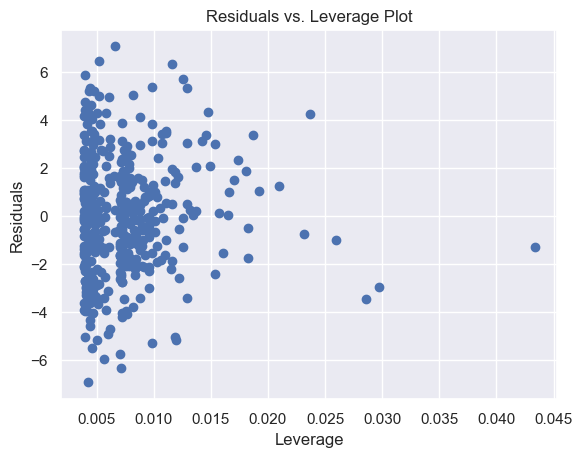

Observations with high Cook's distance:
Series([], dtype: float64)


In [110]:
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as oi

# Assuming lm_fit2 is your fitted linear regression model
# You should replace lm_fit2 with the actual name of your fitted model

# Get the residuals, leverage, and influence statistics
residuals = lm_fit2.resid
leverage = oi.OLSInfluence(lm_fit2).hat_matrix_diag
influence = oi.OLSInfluence(lm_fit2).influence

# Plot the residuals vs. leverage to identify potential outliers
import matplotlib.pyplot as plt
plt.scatter(leverage, residuals)
plt.xlabel("Leverage")
plt.ylabel("Residuals")
plt.title("Residuals vs. Leverage Plot")
plt.show()

# Calculate Cook's distance to identify influential observations
cooks_distance = oi.OLSInfluence(lm_fit2).cooks_distance[0]

# Print observations with high Cook's distance
print("Observations with high Cook's distance:")
print(cooks_distance[cooks_distance > 4/len(lm_fit2.params)])  # Threshold for high influence


## No evidence of any outliers.

## 12. This problem involves simple linear regression without an intercept.

(a) Recall that the coefficient estimate βˆ for the linear regression of Y onto X without an intercept is given by (3.38). Under what circumstance is the coefficient estimate for the regression of X onto Y the same as the coefficient estimate for the regression of Y onto X?

The numerator term of the equation is equal for both regressions. For the coefficients be the same the denominator term must be equal too. So,
∑i=1nx2i=∑i=1ny2i

(b) Generate an example in Python with n = 100 observations in which the coefficient estimate for the regression of X onto Y is different from the coefficient estimate for the regression of Y onto X.

In [111]:
# Generate random data
np.random.seed(0)  # For reproducibility
x = np.random.normal(loc=10, scale=10, size=100)
y = 2 * x + np.random.normal(loc=5, scale=20, size=100)

# Fit the linear regression models
lm_fit_b1 = sm.OLS(y, x).fit()
lm_fit_b2 = sm.OLS(x, y).fit()

# Get coefficients for lm_fit_b1
coef_lm_fit_b1 = lm_fit_b1.params
print("Coefficients for lm_fit_b1:")
print(coef_lm_fit_b1)

# Get coefficients for lm_fit_b2
coef_lm_fit_b2 = lm_fit_b2.params
print("\nCoefficients for lm_fit_b2:")
print(coef_lm_fit_b2)

Coefficients for lm_fit_b1:
[2.43794243]

Coefficients for lm_fit_b2:
[0.30628091]


(c) Generate an example in Python with n = 100 observations in which the coefficient estimate for the regression of X onto Y is the same as the coefficient estimate for the regression of Y onto X.

In [112]:
# Generate random data
np.random.seed(0)  # For reproducibility
x = np.random.normal(loc=10, scale=10, size=100)

# Create another distribution `y` such that the sum of x^2 equals the sum of y^2
sum_x_squared = np.sum(x ** 2)
y_ult = sum_x_squared / 50
r = y_ult / (100 - 1)
y = np.sqrt(np.arange(0, y_ult + r, r))

# Fit the linear regression models
lm_fit_c1 = sm.OLS(y, x).fit()
lm_fit_c2 = sm.OLS(x, y).fit()

# Get coefficients for lm_fit_c1
coef_lm_fit_c1 = lm_fit_c1.params
print("Coefficients for lm_fit_c1:")
print(coef_lm_fit_c1)

# Get coefficients for lm_fit_c2
coef_lm_fit_c2 = lm_fit_c2.params
print("\nCoefficients for lm_fit_c2:")
print(coef_lm_fit_c2)


Coefficients for lm_fit_c1:
[0.64334256]

Coefficients for lm_fit_c2:
[0.64334256]
